In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format

In [63]:
df=pd.read_csv("datasets_1291_2355_Automobile_data.csv" , na_values='?')

In [64]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [65]:
df.info()
#show missing value in normalized-losses,num-of-doors ,bore ,stroke , peak-rpm, and price.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [66]:
#Missing processing values in normalized-losses
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)

In [67]:
#Missing processing values in num-of-doors
df['num-of-doors'].fillna(df['num-of-doors'].mode(),inplace=True)

In [68]:
#Missing processing values in bore
df['bore'].fillna(df['bore'].mean(),inplace=True)

In [69]:
#Missing processing values in stroke
df['stroke'].fillna(df['stroke'].median(),inplace=True)

In [70]:
#Missing processing values in peak-rpm
df['peak-rpm'].fillna(df['peak-rpm'].median(),inplace=True)

In [71]:
#Missing processing values in price
df['price'].fillna(df['price'].median(),inplace=True)

In [72]:
df['engine-location'].value_counts()
#Show almost datat are the same

front    202
rear       3
Name: engine-location, dtype: int64

In [73]:
#drop engine-location not add any new data
df.drop(['engine-location'],axis=1,inplace=True)

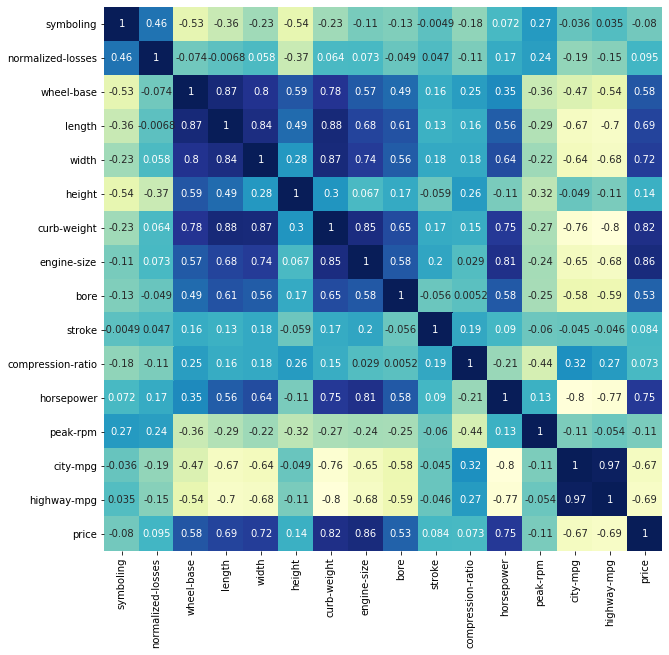

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, 
cmap="YlGnBu", cbar=False)
#show highway-mpg depend on city-mpg

In [75]:
#drop highway-mpg not add any new data more than city-mpg
df.drop(['highway-mpg'],axis=1,inplace=True)

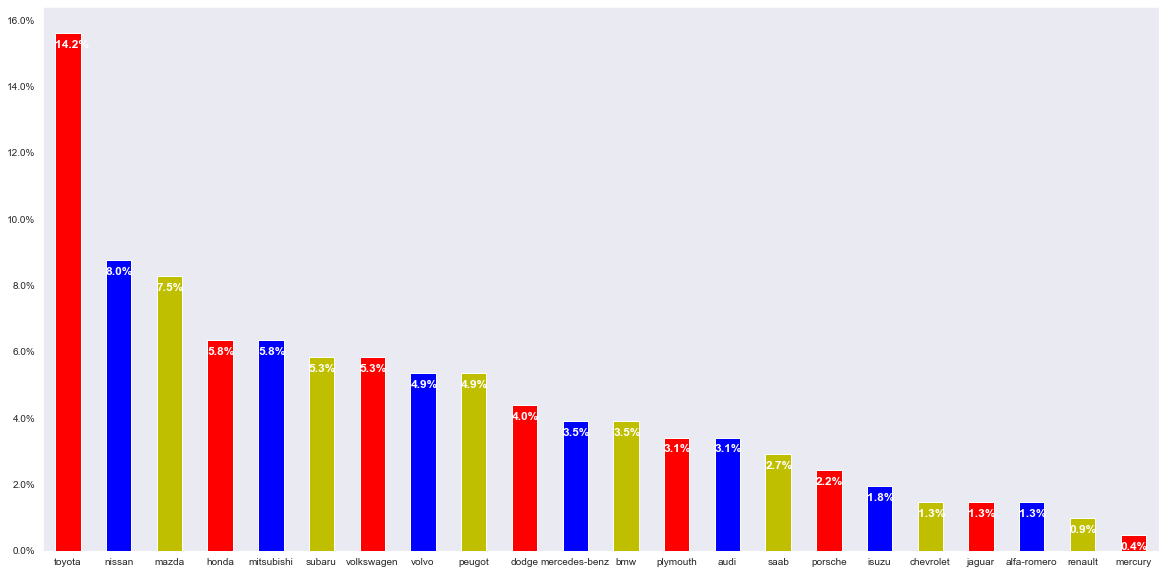

In [158]:
#percent of make auto car
plt.figure(figsize=(20,10))
ax=(df['make'].value_counts()*100/len(df)).plot(kind='bar',
                                                       stacked = True,
                                                        rot = 0,
                                                        color=['red','b','y']
                                                        )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)
#to write  precent to bar
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x(), i.get_height()-.45,\
            str(round((i.get_height()/total)*10, 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
#show toyota most company making autocar    

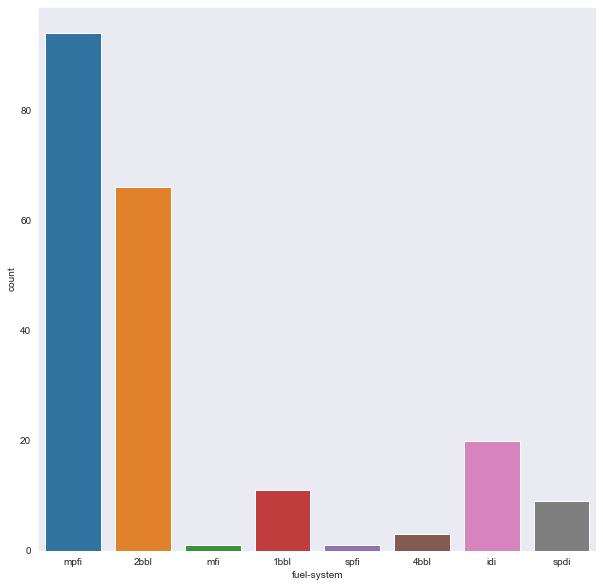

In [180]:
#fuel system
plt.figure(figsize=(10,10))
sns.countplot(x=df['fuel-system'])
plt.show()
#show mpfi are the most using in Autocar

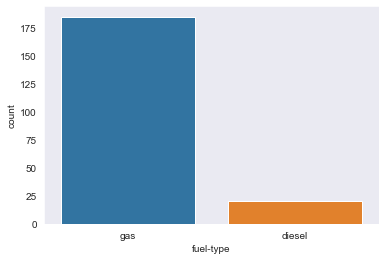

In [182]:
# fuel type chart
sns.countplot(x=df['fuel-type'])
#show most AutoCar Using gass for fuel type

<Figure size 720x720 with 0 Axes>

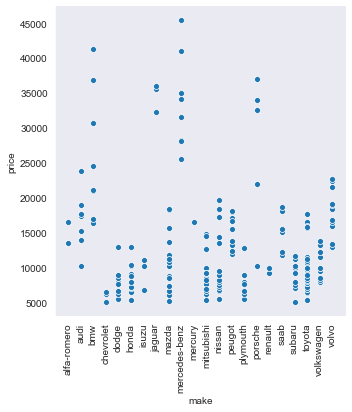

In [187]:
plt.figure(figsize=(10,10))
sns.relplot(x='make', y='price' , data =df , kind='scatter')
plt.xticks(rotation=90)
plt.show()
#show Mercedes-benz is avery cost

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

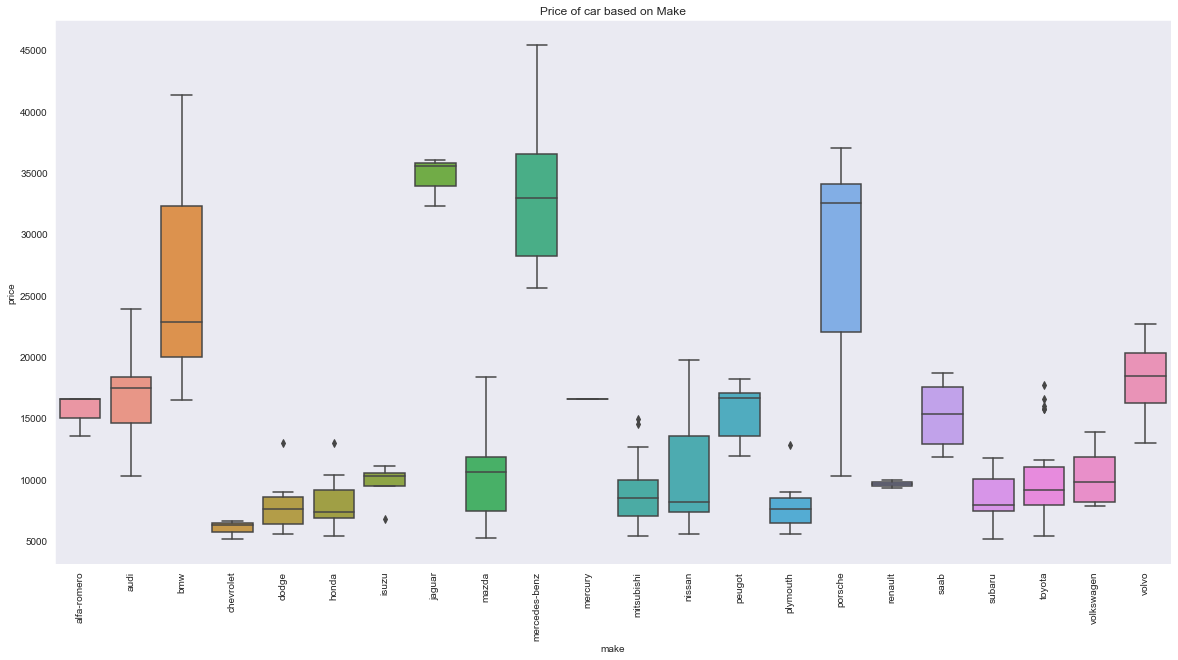

In [220]:
#boxplot between make , price
plt.title('Price of car based on Make')
plt.rcParams['figure.figsize']=(20,10)
sns.boxplot(x="make", y="price", data=df)
plt.xticks(rotation=90)

Text(0.5, 0, 'Fuel type')

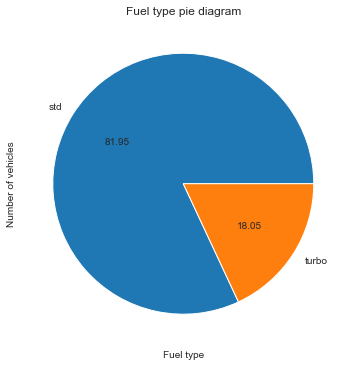

In [184]:
#aspiration type in AutoCar
df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')
#show most AutoCar Using std

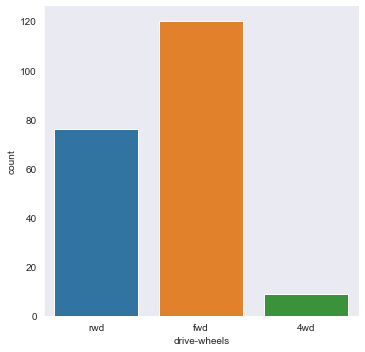

In [194]:
#Drive wheels bar chart
sns.catplot(x='drive-wheels' , data=df,kind='count')
#show 4wd are Rarely used

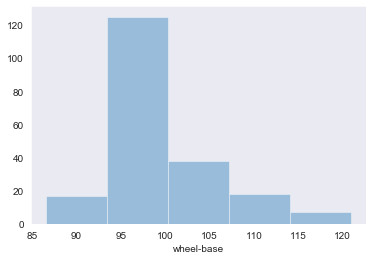

In [202]:
sns.distplot(df['wheel-base'],kde=False ,bins=5)
#show most wheel-base between 95-100

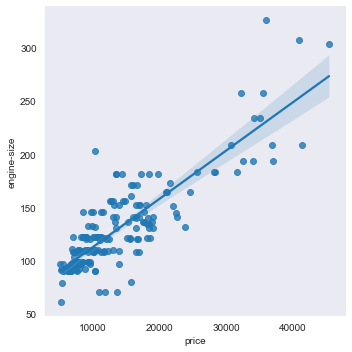

In [223]:
#Scatter plot of price and engine siz
sns.lmplot('price',"engine-size",df)
#show increase engine-size increase price 

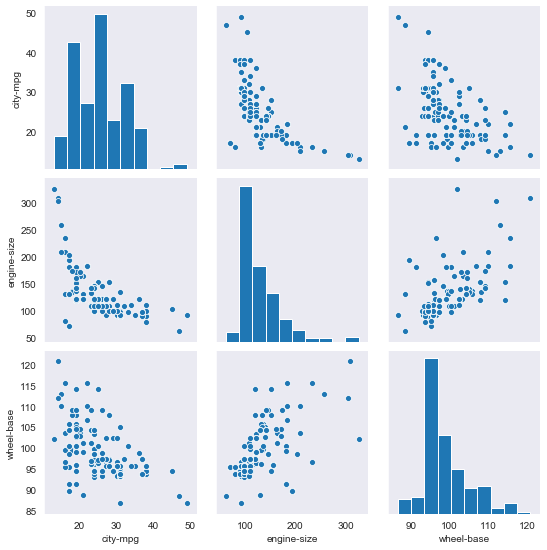

In [233]:
sns.pairplot(df[['city-mpg', 'engine-size', 'wheel-base']])

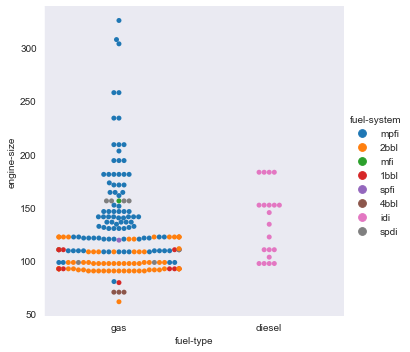

In [242]:
sns.catplot(x="fuel-type", 
               y="engine-size", 
               hue="fuel-system", 
               data=df, 
               kind="swarm")

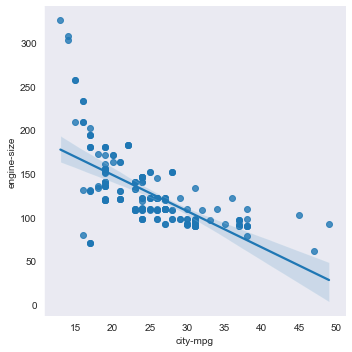

In [243]:
sns.lmplot(x="city-mpg", y="engine-size", data=df)